In [30]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report

sns.set()
%matplotlib inline

endangered_languages = pd.read_csv('./data_sets/endangered_languages_ML.csv')
X = endangered_languages.drop(['Language', 'Extinct'], axis=1)
y = endangered_languages[['Extinct']]
print(X.shape)
print(y.shape)

(1933, 160)
(1933, 1)


In [31]:
log_reg = LogisticRegression(solver='lbfgs')

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

In [42]:
log_reg.fit(X_train, y_train.values.ravel())
y_pred = log_reg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[523   0]
 [ 57   0]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       523
           1       0.00      0.00      0.00        57

   micro avg       0.90      0.90      0.90       580
   macro avg       0.45      0.50      0.47       580
weighted avg       0.81      0.90      0.86       580



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


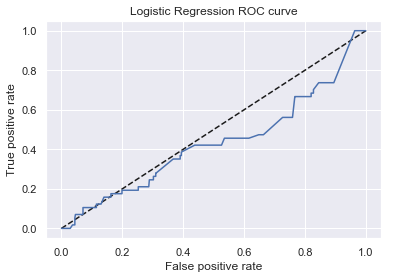

In [34]:
# ROC Curve (threshold is 0.5 for probability (this threshold defines our model), what happens when we vary threshold. 
# What happens to the true positive and false positive rates. WHen threshold = 0, the model predicts 1 for all data
# which means the true positive is equal to false positve) 0 and 1 are bad should go straight up and then right
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression ROC curve')
plt.show()

In [40]:
# the larger the area under the ROC curve, the better our model is
roc_auc_score(y_test, y_pred_prob)

# can also be done with cross-validation
cv_scores = cross_val_score(log_reg, X_train, y_train.values.ravel(), cv=5, scoring='roc_auc')
print(cv_scores)

[0.43918326 0.41507286 0.37425697 0.50518214 0.49992379]


In [44]:
# Hyperparameter tuning with GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(log_reg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X_train, y_train.values.ravel())

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 1e-05}
Best score is 0.8994826311899483


In [ ]:
# Hold out test reasoning